In [1]:
import sqlite3

# Connect and create DB
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

# Create table
cursor.execute('''
CREATE TABLE sales (
    id INTEGER PRIMARY KEY,
    product TEXT,
    quantity INTEGER,
    price REAL
);
''')

# Insert sample data
sales_data = [
    ('Laptop', 2, 800.0),
    ('Phone', 5, 500.0),
    ('Tablet', 3, 300.0),
    ('Laptop', 1, 800.0),
    ('Phone', 2, 500.0),
    ('Tablet', 1, 300.0),
]

cursor.executemany('INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?);', sales_data)

conn.commit()
conn.close()

print("sales_data.db created successfully!")


sales_data.db created successfully!


Sales Summary:

  product  total_quantity  revenue
0  Laptop               3   2400.0
1   Phone               7   3500.0
2  Tablet               4   1200.0


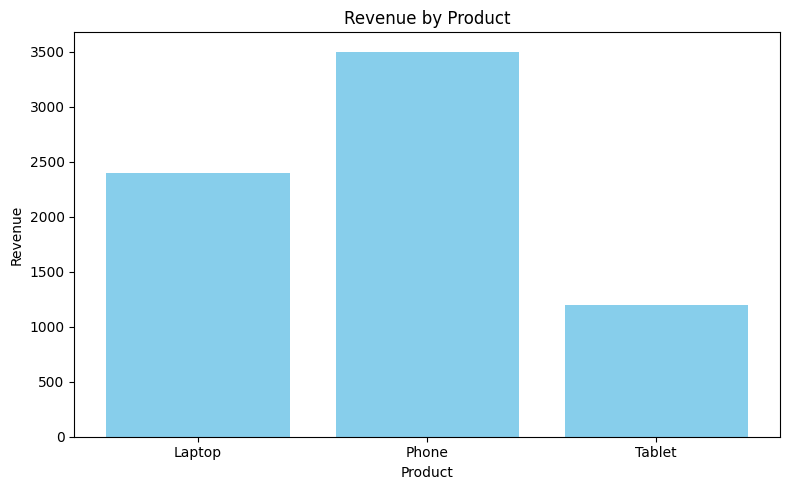

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the database
conn = sqlite3.connect('sales_data.db')

# SQL Query to get total quantity and revenue per product
query = '''
SELECT product,
       SUM(quantity) AS total_quantity,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product;
'''

# Load result into pandas DataFrame
df = pd.read_sql_query(query, conn)

# Print the summary table
print("Sales Summary:\n")
print(df)

# Plotting the revenue by product
plt.figure(figsize=(8, 5))
plt.bar(df['product'], df['revenue'], color='skyblue')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.title('Revenue by Product')
plt.tight_layout()
plt.savefig("task7_sales_chart.png")  # Saves chart as an image (optional)
plt.show()

# Close DB connection
conn.close()
